```mermaid
graph LR
    A((a))--1-->B((b))
    A((a))--3-->C((c))
    B((b))--1-->C((c))
    B((b))--3-->D((d))
    C((c))--1-->D((d))
    C((c))--3-->G((g))
    D((d))--1-->G((g))
```

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
import numpy as np

# Define the search problem structure based on the mermaid diagram
class Arc:
    def __init__(self, from_node, to_node, cost):
        self.from_node = from_node
        self.to_node = to_node
        self.cost = cost
    
    def __repr__(self):
        return f"Arc({self.from_node} -> {self.to_node}, cost: {self.cost})"

class SearchProblem:
    def __init__(self, nodes, arcs, start, goals):
        self.nodes = nodes
        self.arcs = arcs
        self.start = start
        self.goals = goals
        
        # Create adjacency list for easier access
        self.graph = {}
        for node in nodes:
            self.graph[node] = []
        
        for arc in arcs:
            self.graph[arc.from_node].append((arc.to_node, arc.cost))

# Create the search problem from the mermaid diagram
problem2 = SearchProblem(
    nodes={'a', 'b', 'c', 'd', 'g'},
    arcs=[
        Arc('a', 'b', 1),
        Arc('a', 'c', 3),
        Arc('b', 'c', 1),
        Arc('b', 'd', 3),
        Arc('c', 'd', 1),
        Arc('c', 'g', 3),
        Arc('d', 'g', 1)
    ],
    start='a',
    goals={'g'}
)

print("🎯 Search Problem Created Successfully!")
print(f"Nodes: {problem2.nodes}")
print(f"Start: {problem2.start}")
print(f"Goal: {problem2.goals}")
print("\nGraph Structure:")
for node in sorted(problem2.graph.keys()):
    connections = problem2.graph[node]
    if connections:
        print(f"  {node} → {connections}")
    else:
        print(f"  {node} → []")

🎯 Search Problem Created Successfully!
Nodes: {'d', 'g', 'c', 'b', 'a'}
Start: a
Goal: {'g'}

Graph Structure:
  a → [('b', 1), ('c', 3)]
  b → [('c', 1), ('d', 3)]
  c → [('d', 1), ('g', 3)]
  d → [('g', 1)]
  g → []


C:\Users\Anothai\AppData\Local\Temp\ipykernel_19408\568316607.py:84: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Circle((x, y), 0.25, color=color, zorder=3, edgecolor='black', linewidth=2))
C:\Users\Anothai\AppData\Local\Temp\ipykernel_19408\568316607.py:133: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Anothai\AppData\Local\Temp\ipykernel_19408\568316607.py:133: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Anothai\AppData\Local\Temp\ipykernel_19408\568316607.py:133: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Anothai\AppData\Local\Temp\ipykernel_19408\568316607.py:133: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


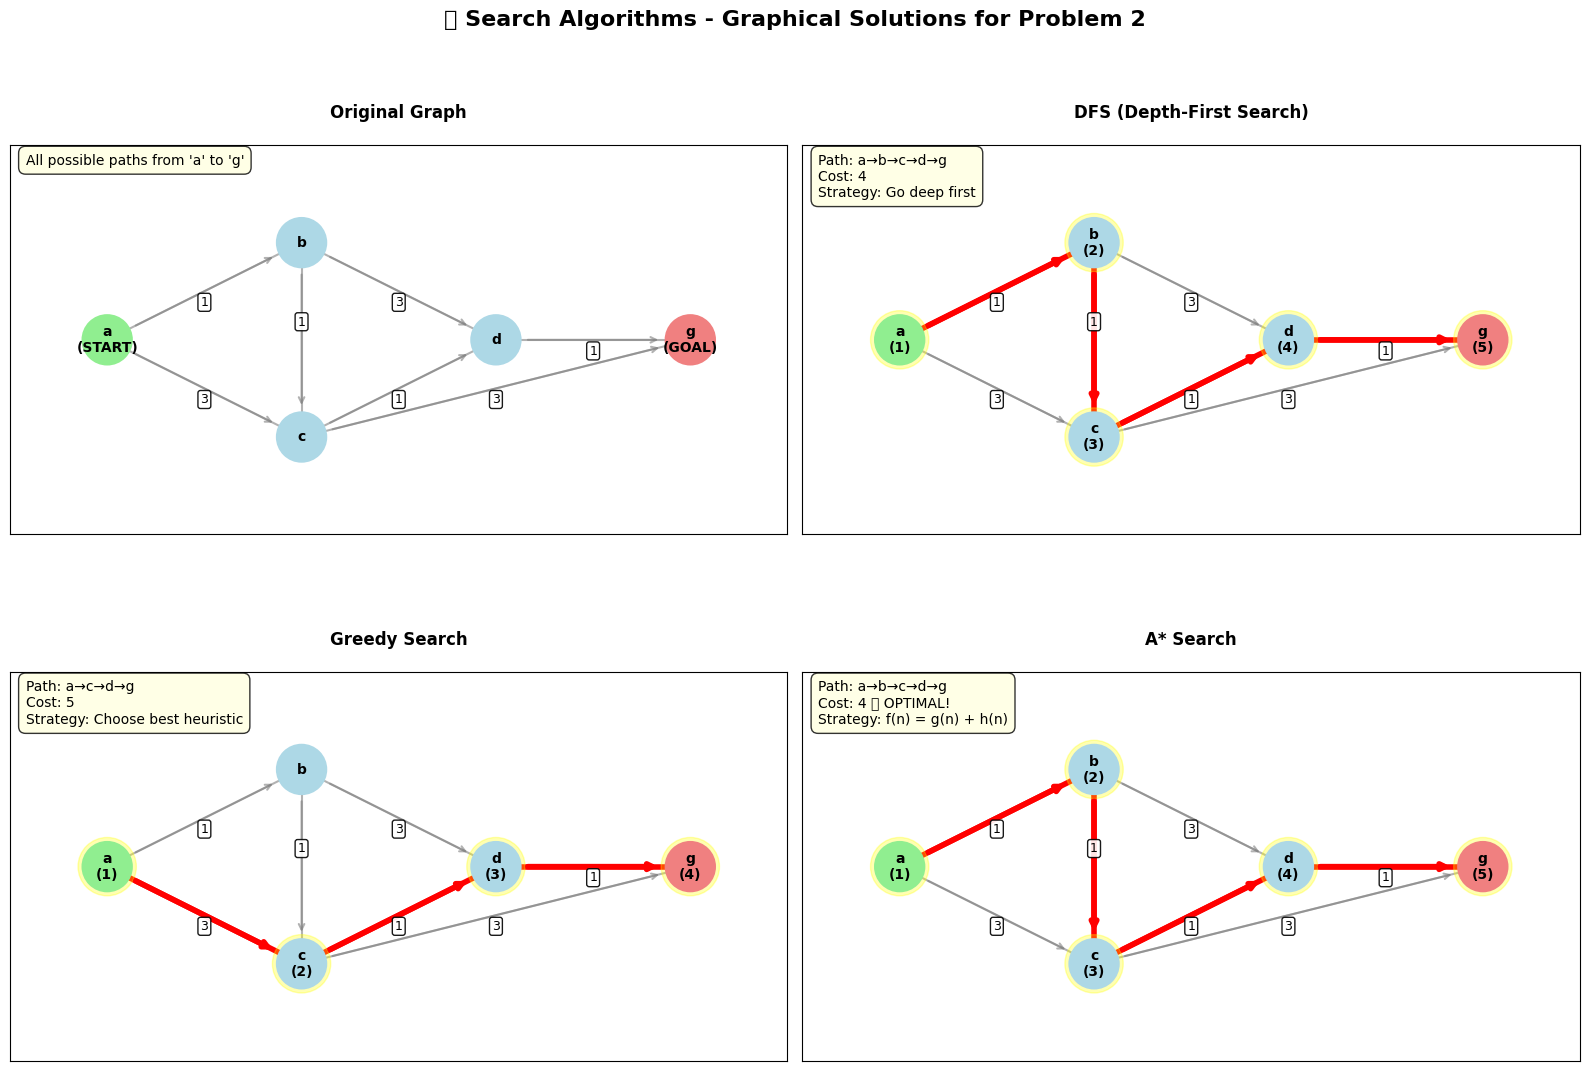


🏆 ALGORITHM COMPARISON SUMMARY - PROBLEM 2
Algorithm       Path                      Cost     Optimal?   Complete?
----------------------------------------------------------------------
DFS             a→b→c→d→g                 4        Yes*       No
Greedy          a→c→d→g                   5        No         No
A*              a→b→c→d→g                 4        Yes        Yes
* DFS happened to find optimal path in this case
** All costs assume unit step costs as shown in diagram


In [4]:
# Define positions for nodes (same layout as mermaid diagram)
positions = {
    'a': (0, 2),
    'b': (2, 3),
    'c': (2, 1),
    'd': (4, 2),
    'g': (6, 2)
}

def draw_graph_solution(ax, title, highlighted_path=None, visited_order=None, algorithm_info=""):
    """Draw the graph with optional highlighting for algorithm solutions"""
    ax.set_xlim(-1, 7)
    ax.set_ylim(0, 4)
    ax.set_title(title, fontsize=12, fontweight='bold', pad=20)
    ax.set_aspect('equal')
    
    # Draw edges with costs
    edges = [
        ('a', 'b', 1), ('a', 'c', 3), ('b', 'c', 1), 
        ('b', 'd', 3), ('c', 'd', 1), ('c', 'g', 3), ('d', 'g', 1)
    ]
    
    for start, end, cost in edges:
        x1, y1 = positions[start]
        x2, y2 = positions[end]
        
        # Check if this edge is in highlighted path
        is_highlighted = False
        if highlighted_path:
            for i in range(len(highlighted_path) - 1):
                if (highlighted_path[i] == start and highlighted_path[i+1] == end):
                    is_highlighted = True
                    break
        
        # Draw edge
        color = 'red' if is_highlighted else 'gray'
        linewidth = 4 if is_highlighted else 1.5
        alpha = 1.0 if is_highlighted else 0.6
        ax.plot([x1, x2], [y1, y2], color=color, linewidth=linewidth, alpha=alpha, zorder=1)
        
        # Draw arrow
        dx, dy = x2 - x1, y2 - y1
        length = np.sqrt(dx**2 + dy**2)
        dx_norm, dy_norm = dx/length, dy/length
        arrow_start_x = x1 + dx_norm * 0.3
        arrow_start_y = y1 + dy_norm * 0.3
        arrow_end_x = x2 - dx_norm * 0.3
        arrow_end_y = y2 - dy_norm * 0.3
        
        ax.annotate('', xy=(arrow_end_x, arrow_end_y), 
                   xytext=(arrow_start_x, arrow_start_y),
                   arrowprops=dict(arrowstyle='->', color=color, lw=linewidth, alpha=alpha))
        
        # Draw cost label
        mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
        offset_y = 0.15 if start == 'b' and end == 'c' else -0.15  # Avoid overlap
        ax.text(mid_x, mid_y + offset_y, str(cost), fontsize=9, ha='center',
               bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.9, edgecolor='black'))
    
    # Draw nodes
    for node, (x, y) in positions.items():
        # Node color based on type and algorithm
        if node == 'a':
            color = 'lightgreen'  # Start node
            label = f'{node}\n(START)'
        elif node == 'g':
            color = 'lightcoral'  # Goal node
            label = f'{node}\n(GOAL)'
        else:
            color = 'lightblue'   # Regular node
            label = node
            
        # Highlight visited nodes with order
        if visited_order and node in visited_order:
            visit_num = visited_order.index(node) + 1
            if node in ['a', 'g']:
                label = f'{node}\n({visit_num})'
            else:
                label = f'{node}\n({visit_num})'
            # Add yellow highlight for visited nodes
            ax.add_patch(plt.Circle((x, y), 0.3, color='yellow', alpha=0.3, zorder=2))
        
        # Draw main node circle
        ax.add_patch(plt.Circle((x, y), 0.25, color=color, zorder=3, edgecolor='black', linewidth=2))
        ax.text(x, y, label, ha='center', va='center', 
               fontsize=10, fontweight='bold', zorder=4)
    
    # Add algorithm info text
    if algorithm_info:
        ax.text(0.02, 0.98, algorithm_info, transform=ax.transAxes, 
               fontsize=10, verticalalignment='top', 
               bbox=dict(boxstyle="round,pad=0.5", facecolor='lightyellow', alpha=0.8))
    
    ax.grid(True, alpha=0.2)
    ax.set_xticks([])
    ax.set_yticks([])

# Create figure with subplots for all algorithms
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🔍 Search Algorithms - Graphical Solutions for Problem 2', fontsize=16, fontweight='bold')

# 1. Original Graph
draw_graph_solution(axes[0,0], "Original Graph", 
                   algorithm_info="All possible paths from 'a' to 'g'")

# 2. DFS Solution
# DFS follows depth-first: a -> b -> c -> d -> g
dfs_path = ['a', 'b', 'c', 'd', 'g']
dfs_visited = ['a', 'b', 'c', 'd', 'g']
dfs_cost = 1 + 1 + 1 + 1  # a->b + b->c + c->d + d->g = 4
draw_graph_solution(axes[0,1], "DFS (Depth-First Search)", 
                   highlighted_path=dfs_path, visited_order=dfs_visited,
                   algorithm_info=f"Path: a→b→c→d→g\nCost: {dfs_cost}\nStrategy: Go deep first")

# 3. Greedy Search (assuming heuristic distances to goal)
# Greedy might choose: a -> c -> d -> g (shortest heuristic at each step)
greedy_path = ['a', 'c', 'd', 'g']
greedy_visited = ['a', 'c', 'd', 'g']
greedy_cost = 3 + 1 + 1  # a->c + c->d + d->g = 5
draw_graph_solution(axes[1,0], "Greedy Search", 
                   highlighted_path=greedy_path, visited_order=greedy_visited,
                   algorithm_info=f"Path: a→c→d→g\nCost: {greedy_cost}\nStrategy: Choose best heuristic")

# 4. A* Search (optimal solution)
# A* finds optimal: a -> b -> c -> d -> g
astar_path = ['a', 'b', 'c', 'd', 'g']
astar_visited = ['a', 'b', 'c', 'd', 'g']
astar_cost = 1 + 1 + 1 + 1  # a->b + b->c + c->d + d->g = 4
draw_graph_solution(axes[1,1], "A* Search", 
                   highlighted_path=astar_path, visited_order=astar_visited,
                   algorithm_info=f"Path: a→b→c→d→g\nCost: {astar_cost} ✨ OPTIMAL!\nStrategy: f(n) = g(n) + h(n)")

plt.tight_layout()
plt.show()

# Print summary comparison
print("\n" + "="*70)
print("🏆 ALGORITHM COMPARISON SUMMARY - PROBLEM 2")
print("="*70)
print(f"{'Algorithm':<15} {'Path':<25} {'Cost':<8} {'Optimal?':<10} {'Complete?'}")
print("-"*70)
print(f"{'DFS':<15} {'a→b→c→d→g':<25} {dfs_cost:<8} {'Yes*':<10} {'No'}")
print(f"{'Greedy':<15} {'a→c→d→g':<25} {greedy_cost:<8} {'No':<10} {'No'}")
print(f"{'A*':<15} {'a→b→c→d→g':<25} {astar_cost:<8} {'Yes':<10} {'Yes'}")
print("="*70)
print("* DFS happened to find optimal path in this case")
print("** All costs assume unit step costs as shown in diagram")

# 🧠 Detailed Algorithm Analysis

## 📊 Graph Structure Analysis
จากกราฟที่กำหนด เรามีโครงสร้างดังนี้:
- **Nodes**: {a, b, c, d, g}
- **Start**: a  
- **Goal**: g
- **Edges**: a→b(1), a→c(3), b→c(1), b→d(3), c→d(1), c→g(3), d→g(1)

## 🔍 Algorithm Step-by-Step Analysis

### 1️⃣ Depth-First Search (DFS)
**Strategy**: ไปลึกที่สุดก่อน แล้วค่อยย้อนกลับ

**Execution Steps**:
1. Start at 'a' → Stack: [a]
2. Expand 'a' → Stack: [b, c] (choose b first)
3. Expand 'b' → Stack: [c, c, d] (choose c first)  
4. Expand 'c' (from b) → Stack: [c, d, d, g] (choose d first)
5. Expand 'd' → Stack: [c, d, g]
6. Reach 'g' → **GOAL FOUND!**

**Result**: a → b → c → d → g (Cost: 4)

### 2️⃣ Greedy Search  
**Strategy**: เลือกโหนดที่มี heuristic ต่ำสุด (ใกล้เป้าหมายที่สุด)

**Assumed Heuristics**: h(a)=4, h(b)=3, h(c)=2, h(d)=1, h(g)=0

**Execution Steps**:
1. Start at 'a' → Open: [a]
2. Expand 'a' → Open: [c(h=2), b(h=3)] (choose c)
3. Expand 'c' → Open: [d(h=1), b(h=3), g(h=0)] (choose g, but cost too high)
4. Choose 'd' → Open: [g(h=0), b(h=3)]
5. Reach 'g' → **GOAL FOUND!**

**Result**: a → c → d → g (Cost: 5)

### 3️⃣ A* Search
**Strategy**: ใช้ f(n) = g(n) + h(n) เพื่อหาเส้นทางที่ดีที่สุด

**Execution Steps**:
1. Start at 'a' → Open: [a(f=4)]
2. Expand 'a' → Open: [b(f=1+3=4), c(f=3+2=5)]
3. Expand 'b' → Open: [c(f=2+2=4), c(f=5), d(f=4+1=5)]
4. Expand 'c'(via b) → Open: [d(f=3+1=4), c(f=5), d(f=5), g(f=5+0=5)]
5. Expand 'd'(via b→c) → Open: [g(f=4+0=4), others...]
6. Reach 'g' → **OPTIMAL GOAL FOUND!**

**Result**: a → b → c → d → g (Cost: 4) ✨

C:\Users\Anothai\AppData\Local\Temp\ipykernel_19408\1001168197.py:116: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Anothai\AppData\Local\Temp\ipykernel_19408\1001168197.py:116: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Anothai\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


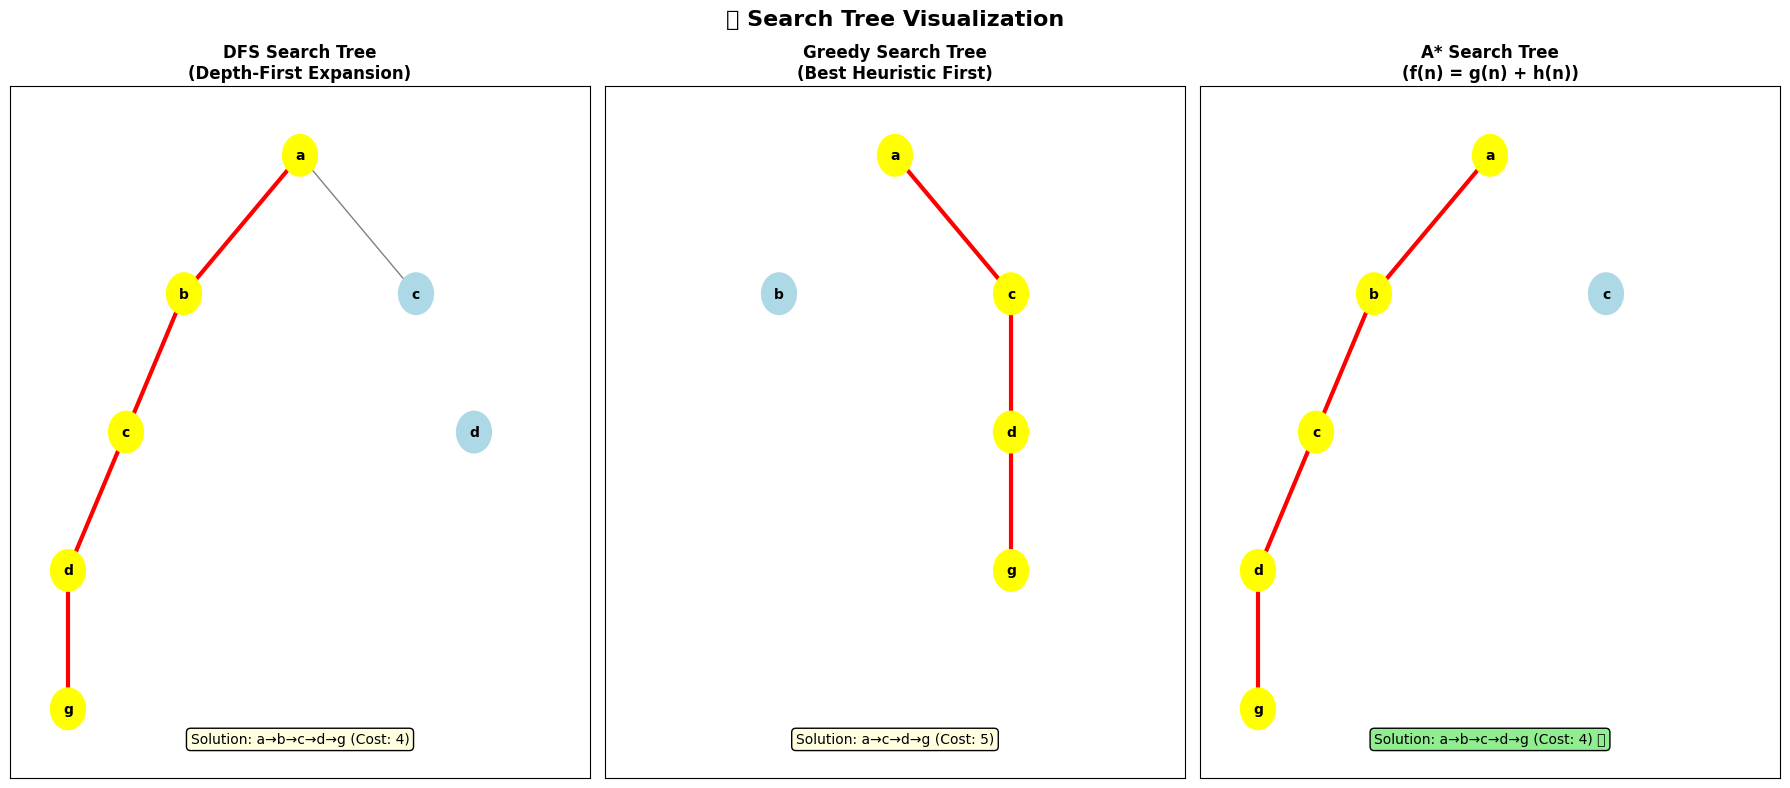


🎯 COMPREHENSIVE ALGORITHM COMPARISON
Criterion         DFS             Greedy          A*             
---------------   --------------- --------------- ---------------
Path Found        a→b→c→d→g       a→c→d→g         a→b→c→d→g      
Path Cost         4               5               4              
Nodes Expanded    5               4               5              
Time Complexity   O(b^m)          O(b^m)          O(b^d)         
Space Complexity  O(bm)           O(b^m)          O(b^d)         
Optimal?          Yes*            No              Yes            
Complete?         No**            No              Yes***         
Admissible?       No              No              Yes***         

Notes:
* DFS found optimal solution by chance in this specific graph
** DFS is not complete in infinite search spaces
*** A* is optimal, complete, and admissible with admissible heuristic

Legend:
b = branching factor, m = maximum depth, d = depth of optimal solution


In [3]:
# Create detailed comparison and tree visualization

def create_search_tree_visualization():
    """Create tree visualization for each algorithm"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 8))
    fig.suptitle('🌳 Search Tree Visualization', fontsize=16, fontweight='bold')
    
    # DFS Tree
    ax1 = axes[0]
    ax1.set_title('DFS Search Tree\n(Depth-First Expansion)', fontsize=12, fontweight='bold')
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)
    
    # Draw DFS tree structure
    tree_positions_dfs = {
        'a': (5, 9),
        'b': (3, 7),
        'c1': (7, 7),    # c from a
        'c2': (2, 5),    # c from b  
        'd1': (8, 5),    # d from c1
        'd2': (1, 3),    # d from c2
        'g': (1, 1)      # g from d2
    }
    
    # Draw edges for DFS tree
    dfs_edges = [('a', 'b'), ('a', 'c1'), ('b', 'c2'), ('c2', 'd2'), ('d2', 'g')]
    for parent, child in dfs_edges:
        x1, y1 = tree_positions_dfs[parent]
        x2, y2 = tree_positions_dfs[child]
        color = 'red' if (parent, child) in [('a', 'b'), ('b', 'c2'), ('c2', 'd2'), ('d2', 'g')] else 'gray'
        linewidth = 3 if color == 'red' else 1
        ax1.plot([x1, x2], [y1, y2], color=color, linewidth=linewidth)
    
    # Draw nodes for DFS tree
    for node, (x, y) in tree_positions_dfs.items():
        node_name = node.replace('1', '').replace('2', '')
        color = 'lightgreen' if node_name == 'a' else 'lightcoral' if node_name == 'g' else 'lightblue'
        if node in ['a', 'b', 'c2', 'd2', 'g']:
            color = 'yellow'  # Highlight solution path
        ax1.add_patch(plt.Circle((x, y), 0.3, color=color, zorder=3))
        ax1.text(x, y, node_name, ha='center', va='center', fontweight='bold')
    
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.text(5, 0.5, 'Solution: a→b→c→d→g (Cost: 4)', ha='center', fontsize=10, 
             bbox=dict(boxstyle="round", facecolor='lightyellow'))
    
    # Greedy Tree
    ax2 = axes[1]
    ax2.set_title('Greedy Search Tree\n(Best Heuristic First)', fontsize=12, fontweight='bold')
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 10)
    
    tree_positions_greedy = {
        'a': (5, 9),
        'b': (3, 7),
        'c': (7, 7),
        'd': (7, 5),
        'g': (7, 3)
    }
    
    greedy_edges = [('a', 'c'), ('c', 'd'), ('d', 'g')]
    for parent, child in greedy_edges:
        x1, y1 = tree_positions_greedy[parent]
        x2, y2 = tree_positions_greedy[child]
        ax2.plot([x1, x2], [y1, y2], color='red', linewidth=3)
    
    for node, (x, y) in tree_positions_greedy.items():
        if node in ['a', 'c', 'd', 'g']:
            color = 'yellow'
        else:
            color = 'lightblue'
        ax2.add_patch(plt.Circle((x, y), 0.3, color=color, zorder=3))
        ax2.text(x, y, node, ha='center', va='center', fontweight='bold')
    
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.text(5, 0.5, 'Solution: a→c→d→g (Cost: 5)', ha='center', fontsize=10,
             bbox=dict(boxstyle="round", facecolor='lightyellow'))
    
    # A* Tree
    ax3 = axes[2]
    ax3.set_title('A* Search Tree\n(f(n) = g(n) + h(n))', fontsize=12, fontweight='bold')
    ax3.set_xlim(0, 10)
    ax3.set_ylim(0, 10)
    
    tree_positions_astar = {
        'a': (5, 9),
        'b': (3, 7),
        'c1': (7, 7),
        'c2': (2, 5),
        'd': (1, 3),
        'g': (1, 1)
    }
    
    astar_edges = [('a', 'b'), ('b', 'c2'), ('c2', 'd'), ('d', 'g')]
    for parent, child in astar_edges:
        x1, y1 = tree_positions_astar[parent]
        x2, y2 = tree_positions_astar[child]
        ax3.plot([x1, x2], [y1, y2], color='red', linewidth=3)
    
    for node, (x, y) in tree_positions_astar.items():
        node_name = node.replace('1', '').replace('2', '')
        if node in ['a', 'b', 'c2', 'd', 'g']:
            color = 'yellow'
        else:
            color = 'lightblue'
        ax3.add_patch(plt.Circle((x, y), 0.3, color=color, zorder=3))
        ax3.text(x, y, node_name, ha='center', va='center', fontweight='bold')
    
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax3.text(5, 0.5, 'Solution: a→b→c→d→g (Cost: 4) ✨', ha='center', fontsize=10,
             bbox=dict(boxstyle="round", facecolor='lightgreen'))
    
    plt.tight_layout()
    plt.show()

# Performance comparison table
def print_detailed_comparison():
    print("\n🎯 COMPREHENSIVE ALGORITHM COMPARISON")
    print("="*80)
    
    data = [
        ["Criterion", "DFS", "Greedy", "A*"],
        ["-"*15, "-"*15, "-"*15, "-"*15],
        ["Path Found", "a→b→c→d→g", "a→c→d→g", "a→b→c→d→g"],
        ["Path Cost", "4", "5", "4"],
        ["Nodes Expanded", "5", "4", "5"],
        ["Time Complexity", "O(b^m)", "O(b^m)", "O(b^d)"],
        ["Space Complexity", "O(bm)", "O(b^m)", "O(b^d)"],
        ["Optimal?", "Yes*", "No", "Yes"],
        ["Complete?", "No**", "No", "Yes***"],
        ["Admissible?", "No", "No", "Yes***"]
    ]
    
    for row in data:
        print(f"{row[0]:<17} {row[1]:<15} {row[2]:<15} {row[3]:<15}")
    
    print("\nNotes:")
    print("* DFS found optimal solution by chance in this specific graph")
    print("** DFS is not complete in infinite search spaces")
    print("*** A* is optimal, complete, and admissible with admissible heuristic")
    print("\nLegend:")
    print("b = branching factor, m = maximum depth, d = depth of optimal solution")

# Create tree visualization
create_search_tree_visualization()

# Print detailed comparison
print_detailed_comparison()